In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import awkward as ak
from joblib import Parallel, delayed

In [9]:
def get_counts_w_dt(n, N, dt):
    ion_counts = ss.poisson.rvs(n, size=N)
    
    ion_t_dist_flat = np.random.uniform(size=np.sum(ion_counts))
    ion_t_dist = ak.unflatten(ion_t_dist_flat,ion_counts)
    ion_t_dist = ak.sort(ion_t_dist, axis=1)
    
    ion_counts_dt = np.sum((ion_t_dist[:,1:] - ion_t_dist[:,:-1]) > dt, axis=1) + np.array(ion_counts > 0, dtype=int)

    return np.mean(ion_counts), np.std(ion_counts)**2, np.mean(ion_counts_dt), np.std(ion_counts_dt)**2, \
        np.histogram(ion_counts, bins=np.arange(0, np.max(ion_counts)+1)), np.histogram(ion_counts_dt, bins=np.arange(0, np.max(ion_counts)+1)),\
        np.sum((ion_counts - np.mean(ion_counts))**2)/np.mean(ion_counts),\
        np.sum((ion_counts_dt - np.mean(ion_counts_dt))**2)/np.mean(ion_counts_dt),
    # Dispersion test https://web.archive.org/web/20131125225020/http://www.stats.uwo.ca/faculty/aim/2004/04-259/notes/DispersionTests.pdf \    

In [10]:
dt = 1e-3
N = 100000
ns = np.arange(1, 100, 1)
results = Parallel(n_jobs=8, verbose=10)(delayed(get_counts_w_dt)(n, N, dt) for n in ns)
variance,mean,variance_dt,mean_dt,hist,hist_dt,D,D_dt = zip(*results)

variance = np.array(variance)
mean = np.array(mean)
variance_dt = np.array(variance_dt)
mean_dt = np.array(mean_dt)
D = np.array(D)
D_dt = np.array(D_dt)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Batch computation too fast (0.0532s.) Setting batch_size=2.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done  52 tasks      | elapsed:    2.2s
[Parallel(n_jobs=8)]: Batch computation too slow (2.0358s.) Setting batch_size=1.
[Parallel(n_jobs=8)]: Done  74 out of  99 | elapsed:    3.7s remaining:    1.2s
[Parallel(n_jobs=8)]: Done  84 out of  99 | elapsed:    4.9s remaining:    0.8s
[Parallel(n_jobs=8)]: Done  99 out of  99 | elapsed:    5.9s finished


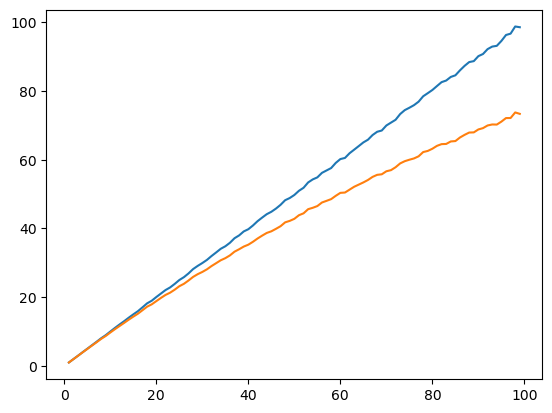

In [11]:
fig,ax = plt.subplots(1,2)

ax[0].plot(ns, mean)
ax[0].plot(ns, mean_dt)

ax[1].plot(ns,variance)
ax[1].plot(ns,variance_dt)

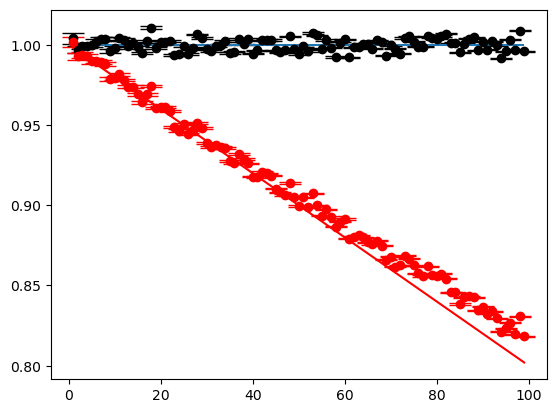

In [12]:
plt.errorbar(ns, mean/variance, np.sqrt(variance/N)/variance, capsize=8, fmt='ko')
plt.errorbar(ns, mean_dt/variance_dt, np.sqrt(variance_dt/N)/variance_dt, capsize=8, fmt='ro')
plt.plot(ns, 1-ns*dt*2, 'r-')
plt.hlines(1, np.min(ns), np.max(ns))

<BarContainer object of 45 artists>

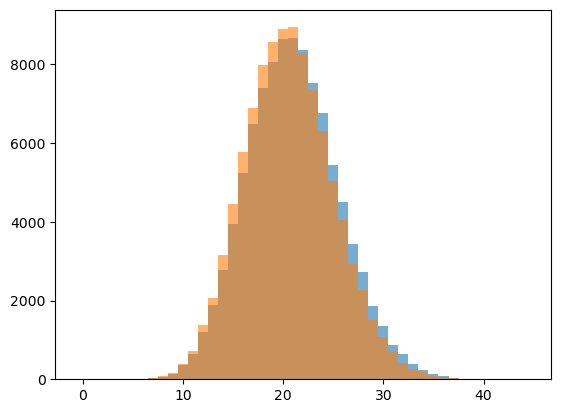

In [13]:
i = 20
plt.bar(hist[i][1][:-1],   hist[i][0],     width=1, alpha=0.6)
plt.bar(hist_dt[i][1][:-1],hist_dt[i][0],  width=1, alpha=0.6)